# Figure 3. Expression of *PDCD6* in human and mouse inner ear 

#### Importing necessary packages

In [3]:
library(tidyverse)
library(ggplot2)
require(grid)

Loading required package: grid


#### Panel A: FACS Line Plot

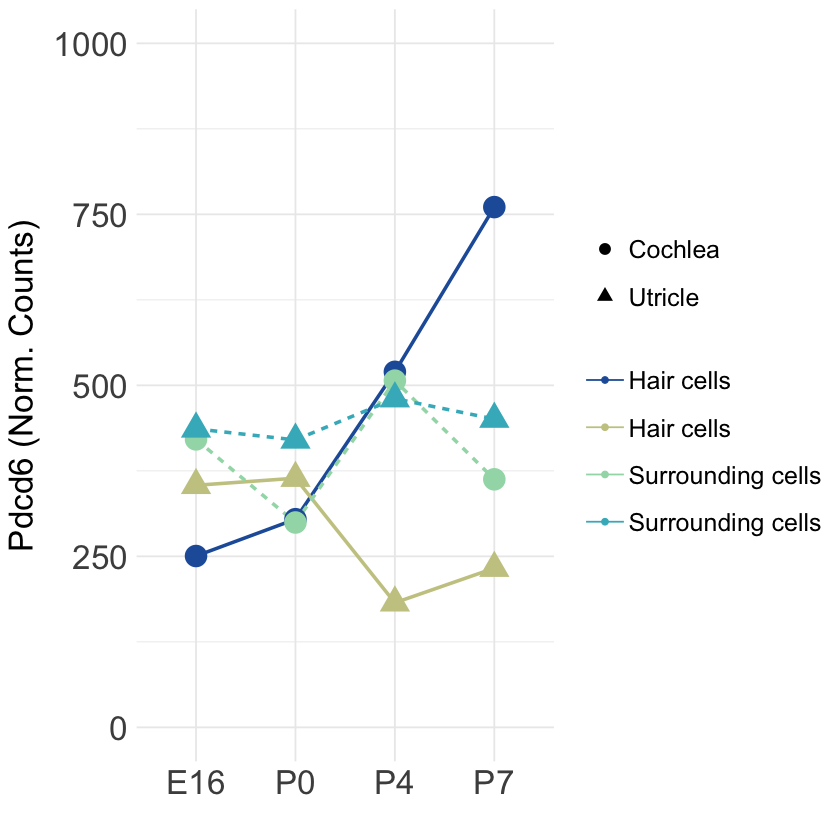

In [2]:
FACS <- read.table('PDCD6/Datasets/PDCD6_FACS.txt',sep='\t', header=TRUE)
custom_colours <- c("#225ea8","#c9c991","#a1dab4","#41b6c4")

Pdcd6_line_plot <- ggplot(FACS, aes(x=Stage, y=Pdcd6, group=Tissue, shape=Inner_Ear, linetype=Cells)) +
  geom_line(aes(color=Tissue, size=1))+
  geom_point(aes(color=Tissue, size=3)) + 
  theme_minimal() + 
  labs(x="", y="Pdcd6 (Norm. Counts)") +
  scale_colour_manual(labels=c("Hair cells","Hair cells","Surrounding cells","Surrounding cells"), values=custom_colours) +
  theme(axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20, margin=margin(r=10)),
        axis.text.x = element_text(size=20),
        axis.text.y = element_text(size=20),
        legend.title = element_blank(),
        legend.text = element_text(size=15),
        legend.key.size = unit(1, "cm"), 
        strip.text.x = element_text(size=15)) +
  guides(size = FALSE, linetype = FALSE, shape = guide_legend(override.aes = list(size=3))) +
  scale_y_continuous(limits = c(0, 1000))

Pdcd6_line_plot

In [ ]:
name <- "PDCD6_FACSLine"
ggsave(filename=paste(name,".png",sep=""),width=9,height=6,dpi=300,plot=Pdcd6_line_plot)

#### Panel C: GANGL Box Plots

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

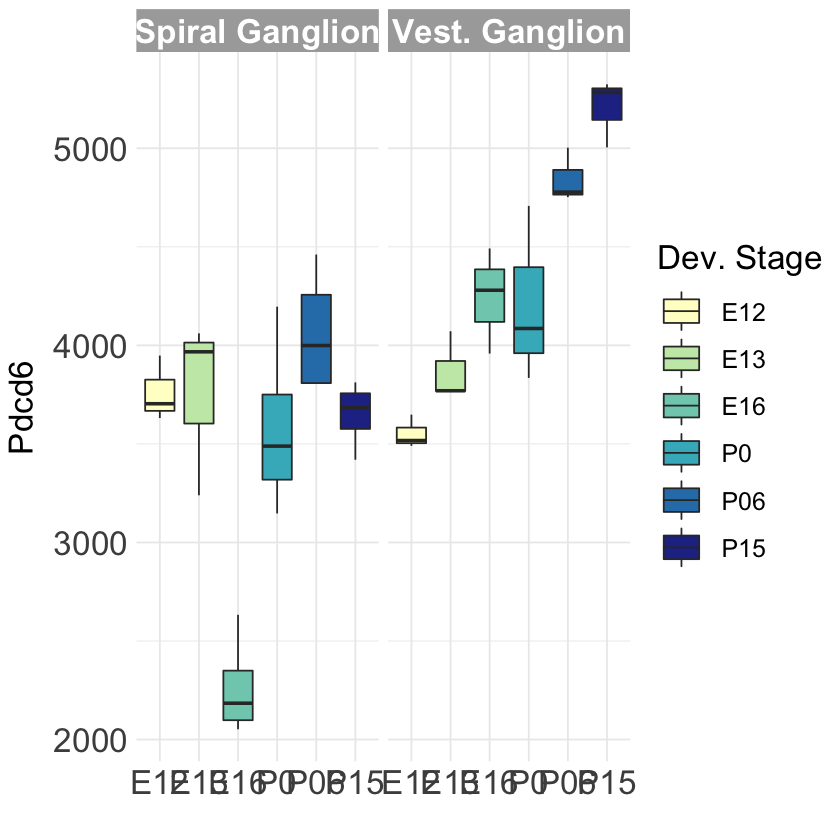

In [5]:
GANGL <- read.table('PDCD6/Datasets/PDCD6_GANGL.txt',sep='\t', header=TRUE)
GANGL_colours <- c("#ffffcc","#c7e9b4","#7fcdbb","#41b6c4","#2c7fb8","#253494")

Pdcd6_box_plot <- ggplot(GANGL, aes(x = Stage, y = Pdcd6, fill = Stage)) + 
  facet_wrap(~Tissue) +
  geom_boxplot()  + 
  theme_minimal() +
  theme(
    strip.text = element_text(face="bold", color="white", size=rel(1.5)),
    strip.background = element_rect(fill="dark grey", color=NA, size=1),
    plot.title = element_text(lineheight=.8, face="bold",size=20),
    axis.title.x = element_text(size=20),
    axis.title.y = element_text(size=20, margin=margin(r=10)),
    axis.text.x = element_text(size=20),
    axis.text.y = element_text(size=20),
    legend.title = element_text(size=20),
    legend.text = element_text(size=15),
    legend.key.size = unit(1, "cm"),
    strip.text.x = element_text(size=20)
  ) + 
  labs(x = "", y = "Pdcd6", fill = "Dev. Stage") +
  scale_fill_manual(values=GANGL_colours)

Pdcd6_box_plot

In [ ]:
name <- "Pdcd6_GANGL_Plot"
ggsave(filename=paste(name,".png",sep=""),width=12,height=7,dpi=300,plot=Pdcd6_box_plot)

#### Panel D: Bar Plots

[1] "\n1 - Ampulla: #2c7fb8\n2 - Cochlea 1: #ffffcc\n3 - Cochlea 3: #c7e9b4\n4 - Cochlea 2: #41b6c4\n5 - Saccule: #253494\n6 - Utricle: #7fcdbb\n"

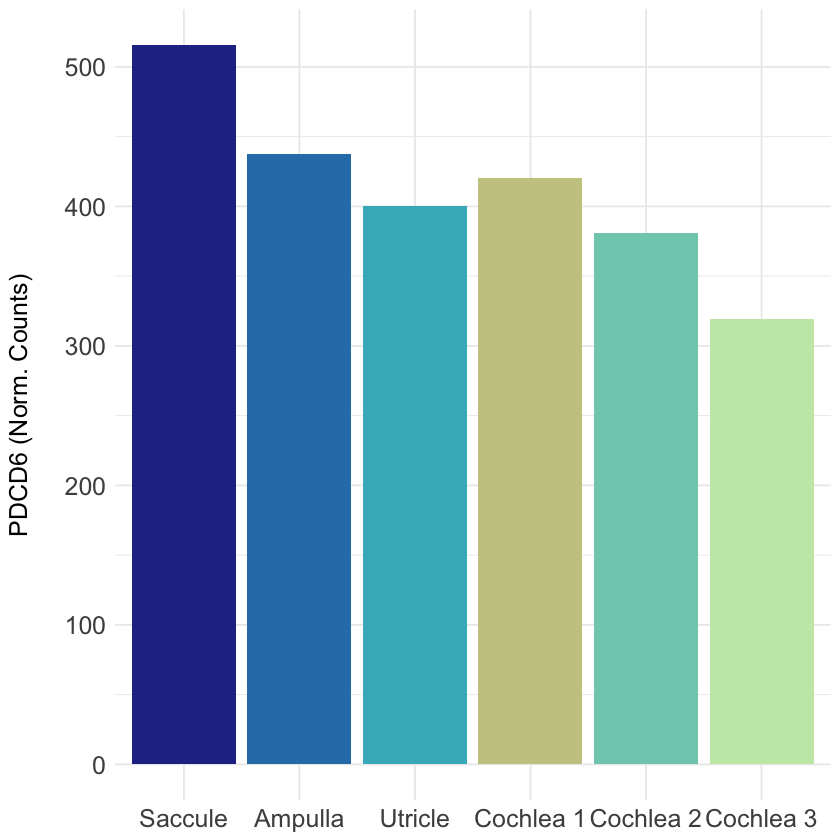

In [6]:
new_data <- read.delim("PDCD6/Datasets/data.txt")
colours <- c("#2c7fb8","#C9C991","#7fcdbb","#c7e9b4","#253494","#41b6c4")
'
1 - Ampulla: #2c7fb8
2 - Cochlea 1: #ffffcc
3 - Cochlea 3: #c7e9b4
4 - Cochlea 2: #41b6c4
5 - Saccule: #253494
6 - Utricle: #7fcdbb
'

positions <- c("Saccule", "Ampulla", "Utricle", "Cochlea 1", "Cochlea 2", "Cochlea 3")
p<-ggplot(new_data, aes(x=Tissue, y=Expression, fill=Tissue)) +
  geom_bar(stat="identity", position=position_dodge()) + theme_minimal()  + scale_fill_manual(values=colours) 
p<-p+
  theme(axis.title.x = element_blank(),
        axis.title.y = element_text(size=15, margin=margin(r=20)),
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        legend.position="none",
        strip.text.x = element_text(size=15)) +
  labs(y="PDCD6 (Norm. Counts)") +
  scale_x_discrete(limits = positions)
p

In [ ]:
name <- "PanelD"
ggsave(filename=paste(name,".png",sep=""),width=11,height=9,dpi=300,plot=p)